In [1]:
import sys
sys.path.append('../src/')
from data_generator import *
from submetered_data import *
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from data_generator import *
import numpy as np
import pandas as pd
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'legend.fontsize': 10})
%matplotlib inline
from scipy.spatial.distance import squareform
from sklearn.preprocessing import LabelEncoder, StandardScaler
from visual_functions import *
from transform_functions import *
fig_path="../paper/img/"
names = ['CFL','ILB','Waterkettle','Fan','AC','HairIron','LaptopCharger','SolderingIron','Fridge','Vacuum','CoffeeMaker','FridgeDefroster']

In [2]:
def load_data(data_type="plaid", submetered=True):
    
    path_sub = f"../data/{data_type}/submetered/" if submetered else f"../data/{data_type}/aggregated/"
    
    current = np.load(path_sub+"current.npy")
    voltage = np.load(path_sub+"voltage.npy")
    labels = np.load(path_sub+"labels.npy")
    return current, voltage, labels

## Industrial

In [3]:
current, voltage, labels = load_data("lilac", submetered=False)
labels = get_correct_labels_lilac(labels)

In [4]:
np.unique(labels)
res_app=['Coffee-machine', 'Drilling-machine', 'Kettle', 'Raclette', 'Refrigerator', 'Vacuum-cleaner', 'Hair-dryer', 'Bulb']
indust_app = []
for l in np.unique(labels):
    if l not in res_app:
        indust_app.append(l)

In [6]:
indust_app

['1-phase-async-motor',
 '3-phase-async-motor',
 'Dumper-machine',
 'Fluorescent-lamp',
 'Freq-conv-squirrel-3-2x',
 'Resistor',
 'Squirrel-3-async',
 'Squirrel-3-async-2x']

In [7]:
hair = np.where(labels=='Refrigerator')[0]
motor = np.where(labels=='1-phase-async-motor')[0]

In [ ]:
from IPython import display
fig = figure(fig_width=7, fig_height=4)
for id in range(len(hair)):
    print(hair[id])
    plt.subplot(1,2,1)
    plt.plot(current[hair[id]][0], voltage[hair[id]][0])
    plt.subplot(1,2,2)
    plt.plot(current[motor[id]][0], voltage[motor[id]][0])
    plt.show()
    plt.tight_layout()
    input("Enter")
    display.clear_output()

In [ ]:
1314, 

Hair-dryer


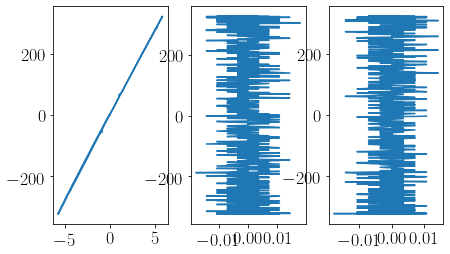

In [13]:
id = 1314
print(labels[id])
fig = figure(fig_width=7, fig_height=4)
plt.subplot(1,3,1)
plt.plot(current[id][0], voltage[id][0])
plt.subplot(1,3,2)
plt.plot(current[id][1], voltage[id][1])
plt.subplot(1,3,3)
plt.plot(current[id][2], voltage[id][2])

In [ ]:
## PLAID

In [23]:
current, voltage, labels = load_data("plaid", submetered=False)

In [27]:
plaid_label =[]
for l in labels:
    idx=l-1 if l<4 else l-2
    plaid_label.append(names[idx])
plaid_label = np.array(plaid_label)

In [30]:
cfl = np.where(plaid_label=='CFL')[0]
laptop = np.where(plaid_label=='LaptopCharger')[0]
len(laptop)

134

In [36]:
from IPython import display
fig = figure(fig_width=7, fig_height=4)
for id in range(len(laptop)):
    print(cfl[id])
    plt.subplot(1,2,1)
    plt.plot(current[laptop[id]], voltage[laptop[id]])
    plt.subplot(1,2,2)
    plt.plot(current[cfl[id]], voltage[cfl[id]])
    plt.show()
    plt.tight_layout()
    input("Enter")
    display.clear_output()

IndexError: index 114 is out of bounds for axis 0 with size 114

<Figure size 432x288 with 0 Axes>

In [ ]:
## laptop noise: 742, 744, 745, 748, 753, 754,765, 769, 770, 776, 
## cfl noise 11,25, 35, 41, 49, 81, 106, 113